# Importing the Libraries

In [2]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
from sklearn.metrics import mean_squared_error
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
from datetime import datetime

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
import math 
import pywt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [39]:
import folium
from folium.plugins import MarkerCluster


In [37]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import mysql.connector

# Importing the Dataset

In [5]:
mydb= mysql.connector.connect(host='localhost', user='root', password='MaestroRoberto'
                             ,database='prova')

In [6]:
mycursor=mydb.cursor()

In [7]:
mycursor.execute('SELECT * FROM tableprova')

In [8]:
myresult=mycursor.fetchall()

In [9]:
mycursor.execute("SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_SCHEMA = 'prova' AND TABLE_NAME ='tableprova'")

In [10]:
mytitles=mycursor.fetchall()

In [11]:
mytitles = list(sum(mytitles, ())) 

In [12]:
df=pd.DataFrame(myresult)
df.columns=mytitles

In [68]:
df['dt']=pd.to_datetime(df.dt)

In [86]:
df['year'] = pd.DatetimeIndex(df['dt']).year
df['month'] = pd.DatetimeIndex(df['dt']).month

In [89]:
df=df[df['year']>1950]

In [90]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
1224,1951-01-01,26.944000000000006,0.441,Abidjan,Côte D'Ivoire,5.63N,3.23W,1951,1
1225,1951-02-01,27.118000000000002,0.569,Abidjan,Côte D'Ivoire,5.63N,3.23W,1951,2
1226,1951-03-01,27.983,0.274,Abidjan,Côte D'Ivoire,5.63N,3.23W,1951,3
1227,1951-04-01,27.914,0.204,Abidjan,Côte D'Ivoire,5.63N,3.23W,1951,4
1228,1951-05-01,26.69,0.168,Abidjan,Côte D'Ivoire,5.63N,3.23W,1951,5


# Display the cities on a WorldMap

In [125]:
world_map= folium.Map()


In [92]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Piero")


In [93]:
CITIES=df.City.drop_duplicates().tolist()

In [94]:
LAT=[]
LONG=[]
for city in CITIES:
    location = geolocator.geocode(city)
    LAT.append(location.latitude)
    LONG.append(location.longitude)

In [98]:
N_CITY=[]
for city in CITIES:
    N_CITY.append(len(df[df['City']==city]))

In [105]:
N_CITY[0:5]

[753, 753, 753, 753, 753]

In [110]:
count=0
for i in N_CITY:
    if i==N_CITY[0]:
        count+=1
if count==len(N_CITY):
    print('All the cities have the same instances, and they are ' + str(N_CITY[0]))

All the cities have the same instances, and they are 753


In [101]:
CITIES=np.array(CITIES)

In [111]:
LAT=np.repeat(np.array(LAT),753)
LONG=np.repeat(np.array(LONG),753)

In [112]:
df['Latitude']=LAT
df['Longitude']=LONG

<ipython-input-112-6c47a21c9aed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude']=LAT
<ipython-input-112-6c47a21c9aed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude']=LONG


In [114]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
1224,1951-01-01,26.944000000000006,0.441,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,1
1225,1951-02-01,27.118000000000002,0.569,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,2
1226,1951-03-01,27.983,0.274,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,3
1227,1951-04-01,27.914,0.204,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,4
1228,1951-05-01,26.69,0.168,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,5


In [118]:
city_data=df.drop_duplicates(subset='City')

In [126]:
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
        lat = city_data.iloc[i]['Latitude']
        long = city_data.iloc[i]['Longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius,fill =True).add_to(marker_cluster)

In [127]:
world_map


In [128]:
MIS_LIST=list(df[df['AverageTemperature']==''].City.drop_duplicates())

In [129]:
NOT_MIS_LIST=list(df.City.drop_duplicates())

In [130]:
list1,list2=MIS_LIST,NOT_MIS_LIST
difference = list(set(list1).symmetric_difference(set(list2)))


In [134]:
print ('The cities that has 0 missing values are: \n')
for i in range(len(difference)):
    print(difference[i] + '\n')

The cities that has 0 missing values are: 

Los Angeles

Santo Domingo

Mexico

Chicago

New York

Toronto

Montreal



# Missing values

In [146]:
df['AverageTemperature']= df.AverageTemperature.apply(pd.to_numeric, args=('coerce',))


<ipython-input-146-5af3a8ce4c1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AverageTemperature']= df.AverageTemperature.apply(pd.to_numeric, args=('coerce',))


In [158]:
print ('The total number of missing temperature in the dataset is ' + str(sum(df.AverageTemperature.isna())) + ' out of '+str(len(df)))

The total number of missing values in the dataset is 93 out of 75300


In [159]:
df['AverageTemperatureUncertainty']= df.AverageTemperatureUncertainty.apply(pd.to_numeric, args=('coerce',))


<ipython-input-159-06f252500d71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AverageTemperatureUncertainty']= df.AverageTemperatureUncertainty.apply(pd.to_numeric, args=('coerce',))


In [160]:
print ('The total number of missing error in the dataset is ' + str(sum(df.AverageTemperatureUncertainty.isna())) + ' out of '+str(len(df)))

The total number of missing error in the dataset is 93 out of 75300


In [168]:
print('The cities that present missing values are ' + str(len(MIS_LIST)))

The cities that present missing values are 93


In [180]:
MIS_INDEX=[]
for i in range(len(MIS_LIST)):
    
    mis_data=df[df['City']==MIS_LIST[i]].reset_index()
    index = mis_data['AverageTemperature'].index[mis_data['AverageTemperature'].apply(np.isnan)]
    MIS_INDEX.append(index.tolist()[0])

In [182]:
MIS_INDEX[0:5]

[752, 752, 752, 752, 752]

In [185]:
count=0
for i in MIS_INDEX:
    if i==MIS_INDEX[0]:
        count+=1
if count==len(MIS_INDEX):
    print('All the cities have the same missing value, and it is the number ' + str(MIS_INDEX[0]))

All the cities have the same missing value, and it is the number 752


In [187]:
df=df.reset_index()

In [189]:
df=df.drop(columns=['index'])

In [194]:
df=df.dropna()

In [197]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
0,1951-01-01,26.944,0.441,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,1
1,1951-02-01,27.118,0.569,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,2
2,1951-03-01,27.983,0.274,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,3
3,1951-04-01,27.914,0.204,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,4
4,1951-05-01,26.690,0.168,Abidjan,Côte D'Ivoire,5.320357,-4.016107,1951,5


# Correlations

In [208]:
def orange(val):
    color = 'darkorange'
    return 'background-color: %s' % color

def green(val):
    color = 'green'
    return 'background-color: %s' % color

In [249]:
df.corr('pearson').style.applymap(orange, subset=pd.IndexSlice['AverageTemperature', 'year'])
        

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,year,month
AverageTemperature,1.000000,0.124937,-0.356831,0.021579,0.030045,0.094833
AverageTemperatureUncertainty,0.124937,1.000000,-0.147289,-0.104874,-0.037998,-0.041553
Latitude,-0.356831,-0.147289,1.000000,0.111391,0.000102,0.000043
Longitude,0.021579,-0.104874,0.111391,1.000000,-0.000311,-0.000132
year,0.030045,-0.037998,0.000102,-0.000311,1.000000,-0.010511
month,0.094833,-0.041553,0.000043,-0.000132,-0.010511,1.000000


# Stationarity

In [252]:
import statsmodels.tsa.stattools as ts


In [259]:
CITIES=np.array(df.City.drop_duplicates())


In [301]:
P_V=[]
CO=[]
OK=[]
for i in range(len(CITIES)):
    c_data=df[df['City']==CITIES[i]]
    CO.append(c_data.Country.drop_duplicates().tolist()[0])
    p=ts.adfuller(c_data.AverageTemperature)[1]
    P_V.append(p)
    if p>=0.05:
        OK.append(1)
    else:
        OK.append(0)
    
    #co=df[df['Country']==CITIES[i]]
data_p=pd.DataFrame({'P_Value':P_V, 'City':CITIES, 'Country':CO,'Stationary':OK})
data_p.sort_values(by='P_Value',ascending=False)

In [302]:
data_p=pd.DataFrame({'P_Value':P_V, 'City':CITIES, 'Country':CO,'Stationary':OK})
data_p.sort_values(by='P_Value',ascending=False)

,P_Value,City,Country,Stationary
25,5.309698e-02,Dar Es Salaam,Tanzania,1
63,3.634117e-02,Mogadishu,Somalia,0
30,2.189971e-02,Fortaleza,Brazil,0
1,1.648261e-02,Addis Abeba,Ethiopia,0
17,1.226382e-02,Cape Town,South Africa,0
...,...,...,...,...
3,1.027759e-09,Aleppo,Syria,0
35,9.195913e-10,Ho Chi Minh City,Vietnam,0
97,7.015045e-10,Umm Durman,Sudan,0
15,3.570387e-10,Calcutta,India,0


In [307]:
perc=1-sum(OK)/len(OK)

In [330]:
print('The  ' + str(perc*100) + '% of the dataset has failed the stationary test, alpha=5%')

The  99.0% of the dataset has failed the stationary test, alpha=5%


([<matplotlib.axis.XTick at 0x7fa360dd4940>,
 [Text(0, 0, 'Abidjan'),
  Text(0, 0, 'Addis Abeba'),
  Text(0, 0, 'Ahmadabad'),
  Text(0, 0, 'Aleppo'),
  Text(0, 0, 'Alexandria'),
  Text(0, 0, 'Ankara'),
  Text(0, 0, 'Baghdad'),
  Text(0, 0, 'Bangalore'),
  Text(0, 0, 'Bangkok'),
  Text(0, 0, 'Belo Horizonte'),
  Text(0, 0, 'Berlin'),
  Text(0, 0, 'Bogotá'),
  Text(0, 0, 'Bombay'),
  Text(0, 0, 'Brasília'),
  Text(0, 0, 'Cairo'),
  Text(0, 0, 'Calcutta'),
  Text(0, 0, 'Cali'),
  Text(0, 0, 'Cape Town'),
  Text(0, 0, 'Casablanca'),
  Text(0, 0, 'Changchun'),
  Text(0, 0, 'Chengdu'),
  Text(0, 0, 'Chicago'),
  Text(0, 0, 'Chongqing'),
  Text(0, 0, 'Dakar'),
  Text(0, 0, 'Dalian'),
  Text(0, 0, 'Dar Es Salaam'),
  Text(0, 0, 'Delhi'),
  Text(0, 0, 'Dhaka'),
  Text(0, 0, 'Durban'),
  Text(0, 0, 'Faisalabad'),
  Text(0, 0, 'Fortaleza'),
  Text(0, 0, 'Gizeh'),
  Text(0, 0, 'Guangzhou'),
  Text(0, 0, 'Harare'),
  Text(0, 0, 'Harbin'),
  Text(0, 0, 'Ho Chi Minh City'),
  Text(0, 0, 'Hyderabad'),

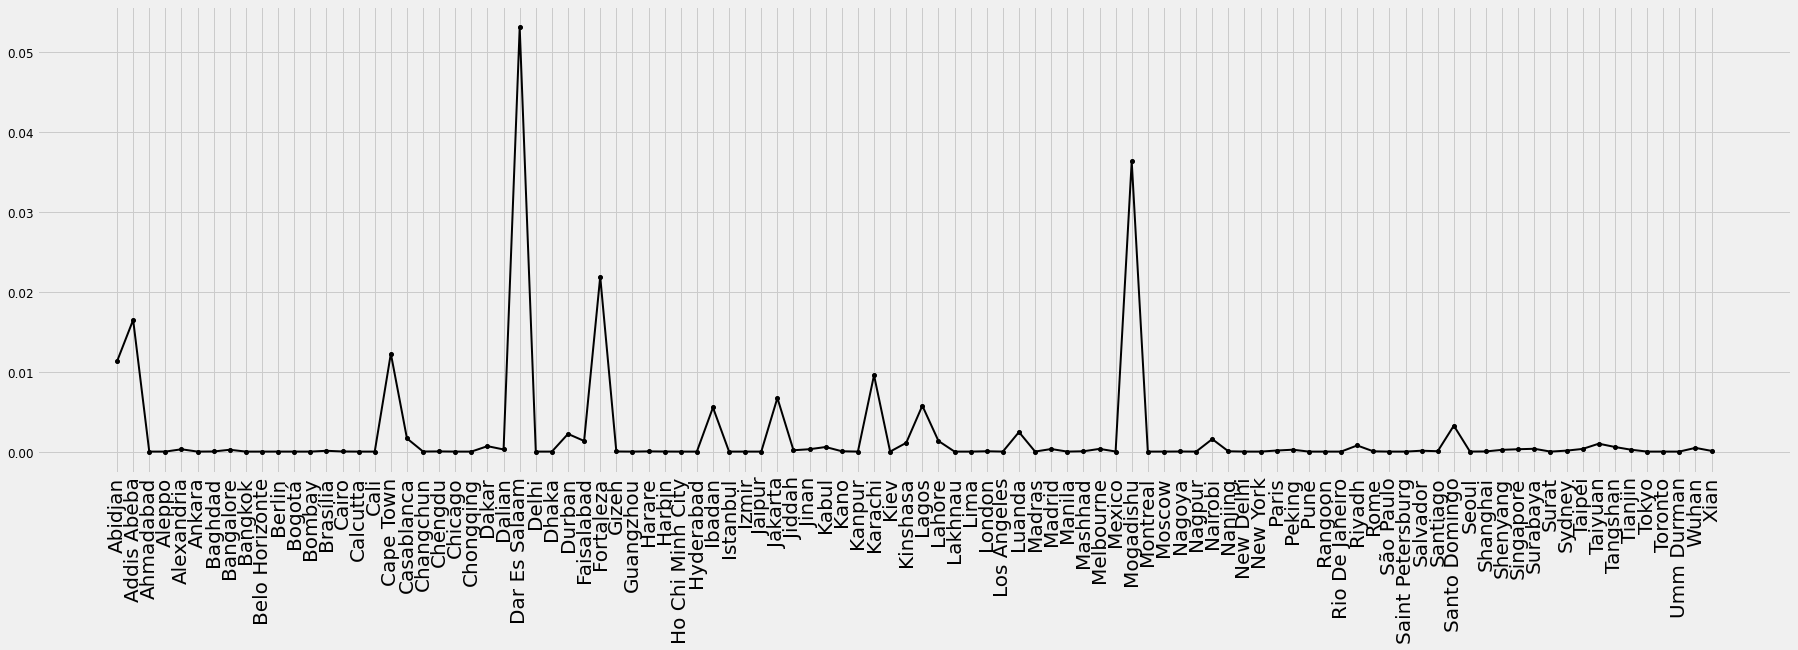

In [329]:
plt.rcParams['figure.figsize'] = (28, 8) 
plt.grid(True)
plt.plot(np.arange(0,len(data_p)),data_p.P_Value,marker='.',color='black')
plt.xticks(np.arange(0,len(data_p)),CITIES,rotation=90,fontsize=20)

In [418]:
YEARS=np.arange(1951+5,2021,5)

In [419]:
PERC=[]
k=0
for y in YEARS:
    k=k+1
    df_year=df[df['year']<=y]
    P_V=[]
    CO=[]
    OK=[]
    for i in range(len(CITIES)):
        c_data=df_year[df_year['City']==CITIES[i]]
        CO.append(c_data.Country.drop_duplicates().tolist()[0])
        p=ts.adfuller(c_data.AverageTemperature)[1]
        P_V.append(p)
        if p>=0.05:
            OK.append(1)
        else:
            OK.append(0)

        #co=ten_df[ten_df['Country']==CITIES[i]]
    PERC.append(1-sum(OK)/len(OK))
    print(str(k) + ' out of ' +str(len(YEARS)))

1 out of 13
2 out of 13
3 out of 13
4 out of 13
5 out of 13
6 out of 13
7 out of 13
8 out of 13
9 out of 13
10 out of 13
11 out of 13
12 out of 13
13 out of 13


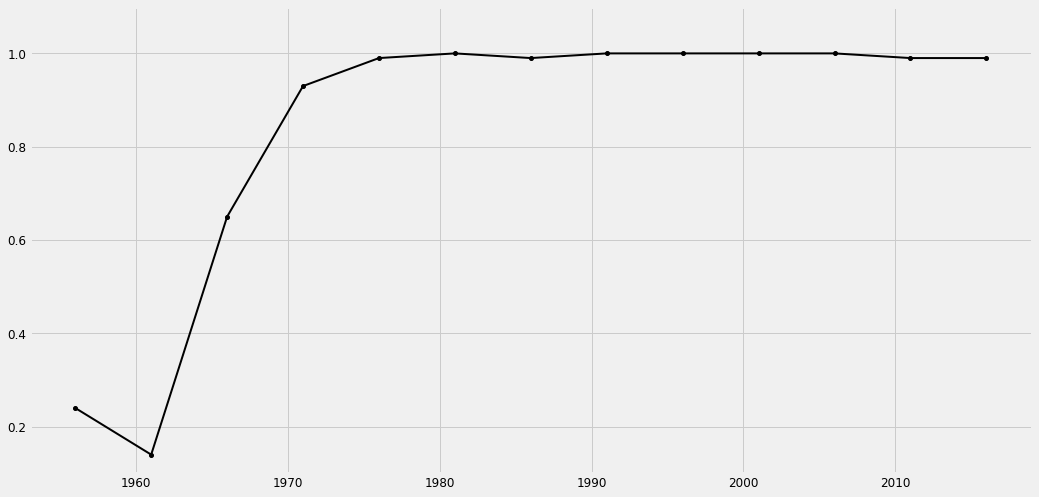

In [420]:
plt.ylim(0.1,1.1)
plt.plot(YEARS,PERC,marker='.',color='black')
plt.grid(True)

In [426]:
df_min=df[df['year']<=YEARS[1]]
P_V=[]
CO=[]
OK=[]
for i in range(len(CITIES)):
    c_data=df_min[df_min['City']==CITIES[i]]
    CO.append(c_data.Country.drop_duplicates().tolist()[0])
    p=ts.adfuller(c_data.AverageTemperature)[1]
    P_V.append(p)
    if p>=0.05:
        OK.append(1)
    else:
        OK.append(0)

In [427]:
data_p=pd.DataFrame({'P_Value':P_V, 'City':CITIES, 'Country':CO,'Stationary':OK})


In [433]:
data_p[data_p['Stationary']==0]

,P_Value,City,Country,Stationary
3,3.854570e-02,Aleppo,Syria,0
4,4.497333e-02,Alexandria,Egypt,0
5,1.359046e-17,Ankara,Turkey,0
10,4.233510e-02,Berlin,Germany,0
14,3.473034e-02,Cairo,Egypt,0
31,3.473034e-02,Gizeh,Egypt,0
38,3.523151e-02,Istanbul,Turkey,0
39,4.330407e-02,Izmir,Turkey,0
44,4.629278e-02,Kabul,Afghanistan,0
48,4.940079e-15,Kiev,Ukraine,0
